In [1]:
from maelzel.core import *
from maelzel.music import lilytools
import logging
# logging.getLogger("maelzel").setLevel("DEBUG")

In [2]:
w = getWorkspace()
cfg = w.config
cfg['.quant.debug'] = True


In [3]:
v1 = Voice(r"""
4C:1
4D:0
4E:1/2:gliss=4G#
""")
print(v1)

Voice([4C:1♩, 4D, 4E:1/2♩:gliss=4G#])


Possible divs: 4941, solutions: 2, best div: (2,), error: 0.00000, time: 1.17ms, cache info: 8181/881
Solutions in order of eval: [(3,), (2,)]
Beat: 1 - 2 (dur: 1)


error,div,slots,info
0.0000,"(2,)","[0, 0, 1, 1]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3963,"(3,)","[0, 0, 2, 2]","gridError=0.396, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Voice([4C:1♩, 4D, 4E:1/2♩:gliss=4G#])
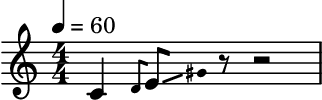

In [6]:
v1

Possible divs: 238, solutions: 1, best div: (3,), error: 0.00000, time: 0.29ms, cache info: 8181/882
Solutions in order of eval: [(3,)]
Beat: 0 - 1/2 (dur: 1/2)


error,div,slots,info
0,"(3,)","[0, 2]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 238, solutions: 1, best div: (3,), error: 0.00000, time: 0.26ms, cache info: 8181/882
Solutions in order of eval: [(3,)]
Beat: 1/2 - 1 (dur: 1/2)


error,div,slots,info
0,"(3,)","[0, 1]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


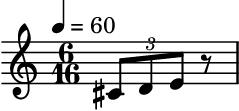

In [7]:
v1 = Voice([
    # "r:0.5",
    Note("4C#", F(1, 3)),
    Note("4D", F(1, 3)),
    Note("4E", F(1, 3)),
])

# v1.show()

with ScoreStruct((6, 16)):
    v1.show()

Possible divs: 4941, solutions: 6, best div: (3, 3, 3), error: 0.00000, time: 15.25ms, cache info: 8181/883
Solutions in order of eval: [(5,), (6,), (7,), (8,), (9,), (3, 3, 3)]
Beat: 0 - 1 (dur: 1)


error,div,slots,info
0.0000,"(3, 3, 3)","[0, 1, 2, 3, 4, 5, 6, 7, 8]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0003,"(9,)","[0, 1, 2, 3, 4, 5, 6, 7, 8]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.04 (0.001265, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.5570,"(8,)","[0, 1, 2, 3, 4, 4, 5, 6, 7]","gridError=0.394, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0003162, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.6267,"(7,)","[0, 1, 2, 2, 3, 4, 5, 5, 6]","gridError=0.443, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0003162, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.6890,"(6,)","[0, 1, 1, 2, 3, 3, 4, 5, 5]","gridError=0.487, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0003162, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.8427,"(5,)","[0, 1, 1, 2, 2, 3, 3, 4, 4]","gridError=0.596, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0003162, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Skipping (7,), weightedGridError: 0.324556, minError: 0.319321
Possible divs: 4941, solutions: 7, best div: (3, 1, 1), error: 0.00000, time: 2.79ms, cache info: 8181/893
Solutions in order of eval: [(3,), (4,), (5,), (6,), (8,), (9,), (3, 1, 1)]
Beat: 1 - 2 (dur: 1)


error,div,slots,info
0.0000,"(3, 1, 1)","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0003,"(9,)","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.04 (0.001265, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2266,"(8,)","[0, 1, 2, 3]","gridError=0.16, rhythmComplexity=0.25 (numSyncop=1, numTies=1), divPenalty=0.01 (0.0003162, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3193,"(6,)","[0, 1, 1, 2]","gridError=0.226, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.0001 (3.162e-06, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.4194,"(5,)","[0, 1, 1, 2]","gridError=0.297, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0003162, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.5187,"(3,)","[0, 0, 1, 1]","gridError=0.367, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.5188,"(4,)","[0, 0, 1, 1]","gridError=0.367, rhythmComplexity=0.112 (numSyncop=1, numTies=0), divPenalty=0.01 (0.0003162, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


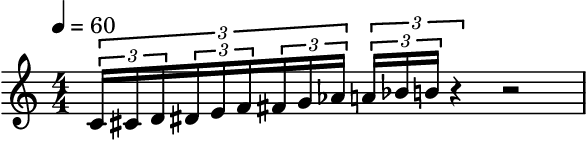

In [8]:
from maelzel.core import *
v1 = Voice([Note(m, F(1, 9)) for m in range(60, 72)])
cfg = getConfig()
cfg['.quant.debug'] = True
cfg['quant.complexity'] = 'highest'

v1.show()

El resultado deberia ser el siguiente

In [ ]:
from maelzel.music import lilytools
lilytools.show(r"\tuplet 3/2 { cis'4 d'4 \tuplet 3/2 { e'8 f'8 g'8} } r2")


Possible divs: 4941, solutions: 1, best div: (3,), error: 0.00000, time: 206.49ms, cache info: 0/1
Solutions in order of eval: [(3,)]
Beat: 0 - 1 (dur: 1)


error,div,slots,info
0,"(3,)","[0, 2]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Skipping (6,), weightedGridError: 0.239908, minError: 0.236264
Skipping (7,), weightedGridError: 0.265179, minError: 0.236264
Skipping (8,), weightedGridError: 0.243761, minError: 0.236264
Skipping (1, 3, 5, 9, 1), weightedGridError: 0.0214581, minError: 0.0194454
Possible divs: 4941, solutions: 6, best div: (1, 3, 3), error: 0.01945, time: 109.93ms, cache info: 0/880
Solutions in order of eval: [(3,), (4,), (5,), (9,), (3, 9), (1, 3, 3)]
Beat: 1 - 2 (dur: 1)


error,div,slots,info
0.0194,"(1, 3, 3)","[0, 1, 3, 5]","gridError=0, rhythmComplexity=0.123 (numSyncop=1.1, numTies=0), divPenalty=0.0003 (3e-06, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0194,"(3, 9)","[0, 2, 4, 8]","gridError=0, rhythmComplexity=0.123 (numSyncop=1.1, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0354,"(9,)","[0, 3, 5, 7]","gridError=0, rhythmComplexity=0.224 (numSyncop=2, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2363,"(5,)","[0, 2, 3, 4]","gridError=0.236, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2793,"(4,)","[0, 1, 2, 3]","gridError=0.279, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3523,"(3,)","[0, 1, 2, 2]","gridError=0.352, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Voice([4C♯:2/3♩, 4D:2/3♩, 4E:2/9♩, 4F:2/9♩, 4G:2/9♩])
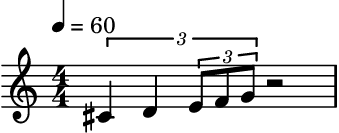

In [4]:
from maelzel.core import *

v1 = Voice([
    Note("4C#", F(2, 3)),
    Note("4D", F(2, 3)),
    Note("4E", F(2, 3)*F(1, 3)),
    Note("4F", F(2, 3)*F(1, 3)),
    Note("4G", F(2, 3)*F(1, 3)),
])
v1

In [5]:
cfg = getConfig()
cfg['.quant.debug'] = False 
%timeit v1.quantizedPart()

64.8 ms ± 466 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
from maelzel.scoring import quantutils
%load_ext line_profiler
%lprun -f quantutils.simplifyDivisionWithSlots v1.quantizedPart()

Timer unit: 1e-09 s

Total time: 0.16767 s
File: /home/em/dev/python/maelzel/maelzel/scoring/quantutils.py
Function: simplifyDivisionWithSlots at line 172

Line #      Hits         Time  Per Hit   % Time  Line Contents
   172                                           def simplifyDivisionWithSlots(division: division_t, assignedSlots: list[int]
   173                                                                         ) -> tuple[division_t, list[int]] | tuple[None, None]:
   174                                           
   175      1252    2024072.0   1616.7      1.2      if len(assignedSlots) == 1 and assignedSlots[0] == 0:
   176                                                   newdiv = (1,)
   177                                                   return (newdiv, assignedSlots) if newdiv != division else (None, None)
   178                                           
   179      1252   11015356.0   8798.2      6.6      lastslot = sum(subdiv for subdiv in division)
   180      1252

In [4]:
cfg['.quant.debug'] = False 
%prun v1.quantizedPart()

         200487 function calls (198016 primitive calls) in 0.292 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1984    0.050    0.000    0.099    0.000 quantutils.py:196(simplifyDivisionWithSlots)
        4    0.044    0.011    0.235    0.059 quant.py:1013(quantizeBeatBinary)
        1    0.021    0.021    0.028    0.028 history.py:92(only_when_enabled)
     1984    0.017    0.000    0.019    0.000 quantutils.py:83(_fitToGridNumpy)
      893    0.015    0.000    0.025    0.000 quant.py:129(_evalGridError)
11474/10459    0.014    0.000    0.034    0.000 {built-in method builtins.sum}
11829/11822    0.013    0.000    0.022    0.000 {built-in method builtins.all}
39190/39185    0.012    0.000    0.012    0.000 {built-in method builtins.len}
      893    0.012    0.000    0.014    0.000 quantutils.py:134(makeSnapped)
    17763    0.008    0.000    0.008    0.000 {method 'append' of 'list' objects}
 1259/251    0.008    0

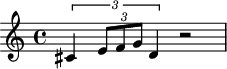

In [3]:
from maelzel.music import lilytools
lilytools.show(r"\tuplet 3/2 { cis'4 \tuplet 3/2 { e'8 f'8 g'8} d'4  } r2")


Voice([4C♯:2/3♩, 4E:2/9♩, 4F:2/9♩, 4G:2/9♩, 4D:2/3♩])
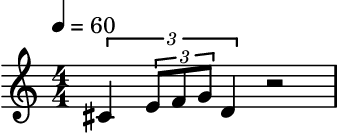

In [6]:
from maelzel.core import *
w = getWorkspace()

Workspace.clearCache()

# The value of the min beat syncopation determines which tuplets can be merged across the beat. Set it
# low to allow more syncopations, set it high to only allow long duration syncopations
w.config['quant.syncopMinFraction'] = 0.167

v1 = Voice([
    Note("4C#", F(2, 3)),
    Note("4E", F(2, 3)*F(1, 3)),
    Note("4F", F(2, 3)*F(1, 3)),
    Note("4G", F(2, 3)*F(1, 3)),
    Note("4D", F(2, 3)),
])
v1

Voice([4D:1/6♩, 4C:2/3♩])
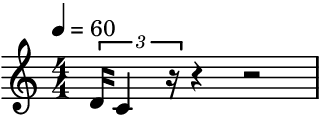

In [7]:
v1 = Voice(r"""
d4:1/6
c4:4/6
""")
v1

Voice([4C♯:2/3♩, 4D:2/3♩, 4E:2/3♩, 4D♯:2/9♩, 4F:2/9♩, 4G:2/9♩, 4A:1/3♩])
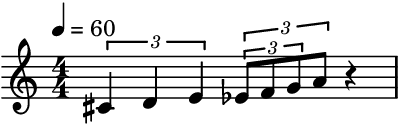

In [8]:
v1 = Voice([
    Note("4C#", F(2, 3)),
    Note("4D",  F(2, 3)),
    Note("4E",  F(2, 3)),
    Note("4D#", F(2,3)*F(1,3)),
    Note("4F",  F(2,3)*F(1,3)),
    Note("4G",  F(2,3)*F(1,3)),
    Note("4A", F(1, 3))
])
v1

Possible divs: 4897, solutions: 5, best div: (8, 1, 1, 1, 1, 1), error: 0.04285, time: 20.95ms, cache info: 12581/6110
Solutions in order of eval: [(1,), (11, 1, 1), (11, 1, 1, 1), (9, 1, 1, 1, 1), (8, 1, 1, 1, 1, 1)]
Beat: 2 - 3 (dur: 1)


error,div,snapped,slots,info
0.0428,"(8, 1, 1, 1, 1, 1)","[Snapped(‹~4D:1/64♩›, offset=0, duration=1/48), Snapped(‹4E~:63/64♩ 0.016:1›, offset=1/48, duration=47/48)]","[0, 1]","gridError=0.0242, rhythmComplexity=0.5 (numSyncop=1, numTies=1), divPenalty=0.02 (0.001414, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0462,"(9, 1, 1, 1, 1)","[Snapped(‹~4D:1/64♩›, offset=0, duration=1/45), Snapped(‹4E~:63/64♩ 0.016:1›, offset=1/45, duration=44/45)]","[0, 1]","gridError=0.0289, rhythmComplexity=0.5 (numSyncop=1, numTies=1), divPenalty=0.105 (0.007422, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0473,"(11, 1, 1, 1)","[Snapped(‹~4D:1/64♩›, offset=0, duration=1/44), Snapped(‹4E~:63/64♩ 0.016:1›, offset=1/44, duration=43/44)]","[0, 1]","gridError=0.0305, rhythmComplexity=0.5 (numSyncop=1, numTies=1), divPenalty=0.11 (0.007778, divPenalty=0.11, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0554,"(11, 1, 1)","[Snapped(‹~4D:1/64♩›, offset=0, duration=1/33), Snapped(‹4E~:63/64♩ 0.016:1›, offset=1/33, duration=32/33)]","[0, 1]","gridError=0.0526, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.104 (0.007382, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0573,"(1,)","[Snapped(‹~4D:1/64♩›, offset=0, duration=0), Snapped(‹4E~:63/64♩ 0.016:1›, offset=0, duration=1)]","[0, 0]","gridError=0.0551, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4897, solutions: 6, best div: (8, 1, 1, 1), error: 0.00794, time: 19.35ms, cache info: 12582/6110
Solutions in order of eval: [(1,), (11, 1), (8, 1, 1), (9, 1, 1), (11, 1, 1), (8, 1, 1, 1)]
Beat: 3 - 4 (dur: 1)


error,div,snapped,slots,info
0.0079,"(8, 1, 1, 1)","[Snapped(‹~4E:1/32♩›, offset=0, duration=1/32), Snapped(‹r:31/32♩ 0.031:1›, offset=1/32, duration=31/32)]","[0, 1]","gridError=0, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.02 (0.001414, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0167,"(11, 1, 1)","[Snapped(‹~4E:1/32♩›, offset=0, duration=1/33), Snapped(‹r:31/32♩ 0.031:1›, offset=1/33, duration=32/33)]","[0, 1]","gridError=0.0055, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.00104 (7.382e-05, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0266,"(9, 1, 1)","[Snapped(‹~4E:1/32♩›, offset=0, duration=1/27), Snapped(‹r:31/32♩ 0.031:1›, offset=1/27, duration=26/27)]","[0, 1]","gridError=0.0214, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.0005 (3.536e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0368,"(8, 1, 1)","[Snapped(‹~4E:1/32♩›, offset=0, duration=1/24), Snapped(‹r:31/32♩ 0.031:1›, offset=1/24, duration=23/24)]","[0, 1]","gridError=0.0332, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.0001 (7.071e-06, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0453,"(11, 1)","[Snapped(‹~4E:1/32♩›, offset=0, duration=1/22), Snapped(‹r:31/32♩ 0.031:1›, offset=1/22, duration=21/22)]","[0, 1]","gridError=0.0419, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.1 (0.007071, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0573,"(1,)","[Snapped(‹~4E:1/32♩›, offset=0, duration=0), Snapped(‹r:31/32♩ 0.031:1›, offset=0, duration=1)]","[0, 0]","gridError=0.0551, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Voice([4C:1♩, 4D:~1/1♩, 4E:~1/1♩])
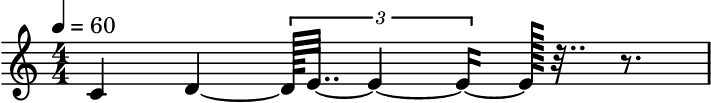

In [7]:
from maelzel.core import *
getConfig()['.quant.debug'] = True

v1 = Voice([
    "4C:1",
    "4D:1+1/64",
    "4E:1+1/64"
])
v1

Possible divs: 4897, solutions: 5, best div: (8, 1, 1, 1, 1, 1), error: 0.04285, time: 18.16ms, cache info: 12583/6110
Solutions in order of eval: [(1,), (11, 1, 1), (11, 1, 1, 1), (9, 1, 1, 1, 1), (8, 1, 1, 1, 1, 1)]
Beat: 2 - 3 (dur: 1)


error,div,snapped,slots,info
0.0428,"(8, 1, 1, 1, 1, 1)","[Snapped(‹~4D:1/64♩›, offset=0, duration=1/48), Snapped(‹4E~:63/64♩ 0.016:1›, offset=1/48, duration=47/48)]","[0, 1]","gridError=0.0242, rhythmComplexity=0.5 (numSyncop=1, numTies=1), divPenalty=0.02 (0.001414, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0462,"(9, 1, 1, 1, 1)","[Snapped(‹~4D:1/64♩›, offset=0, duration=1/45), Snapped(‹4E~:63/64♩ 0.016:1›, offset=1/45, duration=44/45)]","[0, 1]","gridError=0.0289, rhythmComplexity=0.5 (numSyncop=1, numTies=1), divPenalty=0.105 (0.007422, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0473,"(11, 1, 1, 1)","[Snapped(‹~4D:1/64♩›, offset=0, duration=1/44), Snapped(‹4E~:63/64♩ 0.016:1›, offset=1/44, duration=43/44)]","[0, 1]","gridError=0.0305, rhythmComplexity=0.5 (numSyncop=1, numTies=1), divPenalty=0.11 (0.007778, divPenalty=0.11, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0554,"(11, 1, 1)","[Snapped(‹~4D:1/64♩›, offset=0, duration=1/33), Snapped(‹4E~:63/64♩ 0.016:1›, offset=1/33, duration=32/33)]","[0, 1]","gridError=0.0526, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.104 (0.007382, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0573,"(1,)","[Snapped(‹~4D:1/64♩›, offset=0, duration=0), Snapped(‹4E~:63/64♩ 0.016:1›, offset=0, duration=1)]","[0, 0]","gridError=0.0551, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4897, solutions: 6, best div: (8, 1, 1, 1), error: 0.00794, time: 18.41ms, cache info: 12584/6110
Solutions in order of eval: [(1,), (11, 1), (8, 1, 1), (9, 1, 1), (11, 1, 1), (8, 1, 1, 1)]
Beat: 3 - 4 (dur: 1)


error,div,snapped,slots,info
0.0079,"(8, 1, 1, 1)","[Snapped(‹~4E:1/32♩›, offset=0, duration=1/32), Snapped(‹r:31/32♩ 0.031:1›, offset=1/32, duration=31/32)]","[0, 1]","gridError=0, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.02 (0.001414, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0167,"(11, 1, 1)","[Snapped(‹~4E:1/32♩›, offset=0, duration=1/33), Snapped(‹r:31/32♩ 0.031:1›, offset=1/33, duration=32/33)]","[0, 1]","gridError=0.0055, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.00104 (7.382e-05, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0266,"(9, 1, 1)","[Snapped(‹~4E:1/32♩›, offset=0, duration=1/27), Snapped(‹r:31/32♩ 0.031:1›, offset=1/27, duration=26/27)]","[0, 1]","gridError=0.0214, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.0005 (3.536e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0368,"(8, 1, 1)","[Snapped(‹~4E:1/32♩›, offset=0, duration=1/24), Snapped(‹r:31/32♩ 0.031:1›, offset=1/24, duration=23/24)]","[0, 1]","gridError=0.0332, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.0001 (7.071e-06, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0453,"(11, 1)","[Snapped(‹~4E:1/32♩›, offset=0, duration=1/22), Snapped(‹r:31/32♩ 0.031:1›, offset=1/22, duration=21/22)]","[0, 1]","gridError=0.0419, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0.1 (0.007071, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0573,"(1,)","[Snapped(‹~4E:1/32♩›, offset=0, duration=0), Snapped(‹r:31/32♩ 0.031:1›, offset=0, duration=1)]","[0, 0]","gridError=0.0551, rhythmComplexity=0.224 (numSyncop=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Score(2 voices)
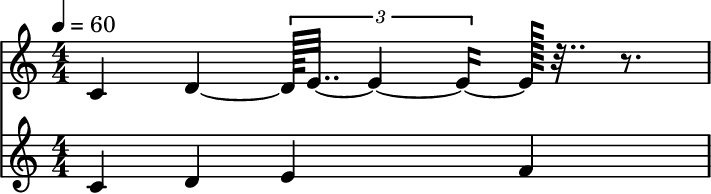

In [8]:
v1 = Voice([
    "4C:1",
    "4D:1+1/64",
    "4E:1+1/64"
])
v2 = Voice([
    "4C:1",
    "4D:1",
    "4E:1",
    "4F:1"
])
sc = Score([v1, v2])
sc

Possible divs: 4897, solutions: 2, best div: (2,), error: 0.00000, time: 0.35ms, cache info: 12584/6111
Solutions in order of eval: [(3,), (2,)]
Beat: 0 - 1 (dur: 1)


error,div,snapped,slots,info
0.0000,"(2,)","[Snapped(‹r:1/2♩›, offset=0, duration=1/2), Snapped(‹4C:𝆔›, offset=1/2, duration=0), Snapped(‹4D:1/2♩ 0.5:1›, offset=1/2, duration=1/2)]","[0, 1, 1]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.4697,"(3,)","[Snapped(‹r:1/2♩›, offset=0, duration=2/3), Snapped(‹4C:𝆔›, offset=2/3, duration=0), Snapped(‹4D:1/2♩ 0.5:1›, offset=2/3, duration=1/3)]","[0, 2, 2]","gridError=0.47, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Voice([R:1/2♩, 4C, 4D:1/2♩])
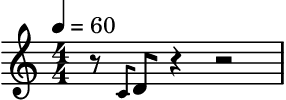

In [9]:
from maelzel.core import *
ws().config['.quant.debug'] = True

v = Voice(r'''
r:0.5
4c:0
4d:0.5
''')
v

[maelzel.scoring.quant:quant.py:621:_splitStrongBeat:DEBUG] split strong: «4G,4B~:3/2♩ properties={'.forwardTies': {0, 1}}», offset: 2
[maelzel.scoring.quant:quant.py:663:_splitWeakBeat:DEBUG] ------------ weak: «4G,4B~:3/2♩ properties={'.forwardTies': {0, 1}}», 2
[maelzel.scoring.quant:quant.py:682:_splitWeakBeat:DEBUG] No need to split since notation «4G,4B~:3/2♩ properties={'.forwardTies': {0, 1}}» is aligned to the beat, beatoffsets=[Fraction(0, 1), Fraction(1, 1), Fraction(2, 1), Fraction(3, 1)]
[maelzel.scoring.quant:quant.py:649:_splitStrongBeat:DEBUG] dotted and not aligned, splitting
[maelzel.scoring:node.py:1153:_splitNotationAtBeat:DEBUG] Syncopation at 0:2 - <bound method QuantizedMeasure._splitStrongBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «r:3/2♩»
                «4C:𝆔»
                «4G,4B~:3/2♩ properties={'.forwardTies': {0, 1}}»
                «~4G,4B:1♩ properties={'.backwardTies': {0, 1}}»), profile=high)> was positive, splittin

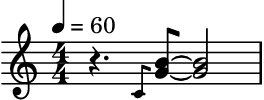

In [10]:
from maelzel.core import *
from maelzel.scoring import logger as sclogger
sclogger.setLevel("DEBUG")
w = getWorkspace()
w.config['.quant.debug'] = False

v = Voice(r"""
r:1.5
4c:0
4g,4b~:0.5
4g,4b~:1
4g,4b:1
""")
q = v.quantizedScore()
q.show()
#q.dump()
#v

[maelzel.scoring.quant:quant.py:621:_splitStrongBeat:DEBUG] split strong: «4G,4B~:3/2♩ properties={'.forwardTies': {0, 1}}», offset: 2
[maelzel.scoring.quant:quant.py:663:_splitWeakBeat:DEBUG] ------------ weak: «4G,4B~:3/2♩ properties={'.forwardTies': {0, 1}}», 2
[maelzel.scoring.quant:quant.py:682:_splitWeakBeat:DEBUG] No need to split since notation «4G,4B~:3/2♩ properties={'.forwardTies': {0, 1}}» is aligned to the beat, beatoffsets=[Fraction(0, 1), Fraction(1, 1), Fraction(2, 1), Fraction(3, 1)]
[maelzel.scoring.quant:quant.py:649:_splitStrongBeat:DEBUG] dotted and not aligned, splitting
[maelzel.scoring:node.py:1153:_splitNotationAtBeat:DEBUG] Syncopation at 0:2 - <bound method QuantizedMeasure._splitStrongBeat of QuantizedMeasure(timesig=4/4, quarterTempo=60, tree=Node(1/1, dur=4 «r:3/2♩»
                «4G,4B~:3/2♩ properties={'.forwardTies': {0, 1}}»
                «~4G,4B:1♩ attachments=[Articulation(kind=accent)] properties={'.backwardTies': {0, 1}}»), profile=high)> was p

Voice([R:3/2♩, ‹4G,4B:0.5♩›, ‹4G,4B:1♩›, ‹4G,4B:1♩›])
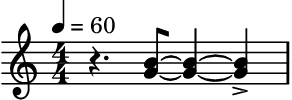

In [11]:
v = Voice(r"""
r:1.5
4g,4b~:0.5
4g,4b~:1
4g,4b:1:accent
""")
v